<a href="https://colab.research.google.com/github/Arahman0i/SSP-Lab/blob/main/SSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **T_c calculation from the McMillan Formula**

---

In [56]:
def mcmillan(lambda_x,mu_star,debye_temp):

    num = -1.04*(1+lambda_x)
    den = lambda_x - mu_star*(1+0.62*lambda_x)
    T_c = (debye_temp/1.45)*np.exp(num/den)
    return T_c

In [57]:
#import numpy as np
def mcmillan(e_ph_const,mu_star,debye_temp):
    """
    This function calculates the Superconducting Critical temperature using
    McMillan formula
    T_c = (Theta_d/1.45)*exp{-1.04(1+lambda)/(lambda-mu_star(1+0.62lambda))}

    Input:
    Theta_d: Debye temperature (K)
    lambda: Electron-phonon constant
    mu_star: electron-electron interaction paramter(dimensionless)

    Output:
    T_c: Superconducting critical temperature (K)
    """
    num= -1.04*(1+e_ph_const)
    den=e_ph_const-mu_star*(1+0.62*e_ph_const)
    T_c=(debye_temp/1.45)*np.exp(num/den)
    return T_c

# Example
e_ph_const=1.04
mu_star=0.1
debye_temp=750
T_c=mcmillan(e_ph_const,mu_star,debye_temp)
#print(T_c)
print(f"The Superconducting temperature {T_c:.2f} K")

The Superconducting temperature 45.84 K


In [58]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 6)

# load data
data = np.loadtxt('../src/silicon/si_bands.dat.gnu')

k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

for band in range(len(bands)):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.5, color='k')
plt.xlim(min(k), max(k))

# Fermi energy
plt.axhline(6.6416, linestyle=(0, (5, 5)), linewidth=0.75, color='k', alpha=0.5)
# High symmetry k-points (check bands_pp.out)
plt.axvline(0.8660, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1.8660, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(2.2196, linewidth=0.75, color='k', alpha=0.5)
# text labels
plt.xticks(ticks= [0, 0.8660, 1.8660, 2.2196, 3.2802], \
           labels=['L', '$\Gamma$', 'X', 'U', '$\Gamma$'])
plt.ylabel("Energy (eV)")
plt.text(2.3, 5.6, 'Fermi energy', fontsize= small)
plt.show()

FileNotFoundError: ../src/silicon/si_bands.dat.gnu not found.

# **Elastic Constant Calculations**

---



In [64]:
Rydberg = 2.179872361*10**-18 # joule
AU = 0.5291772109*10**-10     # metre

def E_elas_Vol(E_0,E,Vol):
  """
  This function computes E_elast, E_elast/Vol (Ry/AU^3) and E_elast/Vol (Joule/m^3)
  I/P: Energy (Ry), Volume (AU^3)

  O/P: E_elast = E - E_0(Ry), E_elast/Vol (Ry/AU^3), E_elast/Vol (Joule/m^3)
  E_0 is undeformed cell energy; E is deformed cell energy corresponding to epsilon_ij
  """
  E_elast = abs(E - E_0)
  E_elast_Vol = E_elast/Vol
  E_elast_si = E_elast_Vol*(Rydberg/AU**3)
  return E_elast, E_elast_Vol, E_elast_si

In [65]:
# Example of Al
E_0 = -158.01241434
E = -158.01241434
Vol = 444.1647
E_elast, E_elast_Vol, E_elast_si = E_elas_Vol(E_0,E,Vol)

print(f"E_elast = {E_elast:.6f} Ry")
print(f"E_elast/Vol = {E_elast_Vol:.6f} Ry/AU^3")
print(f"E_elast/Vol = {E_elast_si:.6f} J/m^3")

E_elast = 0.000000 Ry
E_elast/Vol = 0.000000 Ry/AU^3
E_elast/Vol = 0.000000 J/m^3


In [66]:
# Example of Al (epsilon_yy = 0.05)
E_0 = -158.01241434
E = -158.00104917
Vol = 489.6906
E_elast, E_elast_Vol, E_elast_si = E_elas_Vol(E_0,E,Vol)

print(f"E_elast = {E_elast:.8f} Ry")
print(f"E_elast/Vol = {E_elast_Vol:.8f} Ry/AU^3")
print(f"E_elast/Vol = {E_elast_si:.8f} J/m^3")

E_elast = 0.01136517 Ry
E_elast/Vol = 0.00002321 Ry/AU^3
E_elast/Vol = 341414400.18818682 J/m^3


In [67]:
# Example of Al (epsilon_yy = 0.1)
E_0 = -158.01241434
E = -157.97406597
Vol = 537.4391
E_elast, E_elast_Vol, E_elast_si = E_elas_Vol(E_0,E,Vol)

print(f"E_elast = {E_elast:.8f} Ry")
print(f"E_elast/Vol = {E_elast_Vol:.8f} Ry/AU^3")
print(f"E_elast/Vol = {E_elast_si:.8f} J/m^3")

E_elast = 0.03834837 Ry
E_elast/Vol = 0.00007135 Ry/AU^3
E_elast/Vol = 1049651947.23593938 J/m^3


In [68]:
# Elastic Constants: C11, C12 & C44 for Cubic structure

# Given
epsilon_xx = 0.01
epsilon_xy = 0.005

# Find
C11 = 2*E_elast_Vol/epsilon_xx**2
C12 = E_elast_si/epsilon_xx**2
C44 = E_elast_si/epsilon_xy**2
print("C11 = "+str(C11))
print("C12 = "+str(C12))
print("C44 = "+str(C44))

C11 = 1.427077784254783
C12 = 10496519472359.393
C44 = 41986077889437.57


# **Strain Calculations**

**Python help for Matrix operations:**
1. Tutorial on Python Matrix functions: [Chip](https://www.geeksforgeeks.org/matrix-manipulation-python/)
2. AI Chats: [Chip](https://chatgpt.com/c/68236304-0af0-800e-bfcc-f2870b49af2b)
3. Eigen Value Tutorial: [Chip](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter15.04-Eigenvalues-and-Eigenvectors-in-Python.html)

In [69]:
import numpy as np
from numpy.linalg import eigh
def strained_lattice_vectors(R1,E1):
  """
  This function computes the deformed cell parameters once we
  input:
  R1: Undeformed cell parameters
  E1: Strain tensor calculated with the help of Bilbao Strain Tool:https://www.cryst.ehu.es/cryst/strain.html

  outputs"
  R2 = Deformed cell parameters
  """
  I = np.eye(3) # Identity matrix
  C = 2*E1 + I
  # F = np.sqrt(2*E+I) # deformation gradient tensor
  eigens, eigenvectors = eigh(C)
  sqrt_eigens = np.sqrt(eigens)
  F = np.dot(eigenvectors,np.sqrt(np.diag(eigens)))
  R2 = np.dot(F,R1) # deformed cell parameters
  return R2


In [70]:
# Given
import numpy as np
R1 = np.array([[16.000000,  0.000000,  0.000000 ],
[  0.000000,  16.000000,  0.000000 ],
[  0.000000,  0.000000,  16.000000 ]])

E1 = np.array([[  0.025313, -0.000000, -0.000000 ],
[ -0.000000,  0.025313, -0.000000 ],
[ -0.000000, -0.000000,  0.051250 ]])
x = strained_lattice_vectors(R1,E1)
print(x)

[[16.4000078  0.         0.       ]
 [ 0.        16.4000078  0.       ]
 [ 0.         0.        16.8      ]]


Undeformed Cell, R1:
[  16.000000  0.000000  0.000000 ]
[  0.000000  16.000000  0.000000 ]
[  0.000000  0.000000  16.000000 ]


In [71]:
# input
import numpy as np
from numpy.linalg import inv

R1 = np.array([[  4.000000,  0.000000,  0.000000 ],
[  0.000000,  4.000000,  0.000000 ],
[  0.000000,  0.000000,  4.000000 ]])
print("R1 = "+ str(R1))

R2 = np.array([[  4.100000,  0.000000,  0.000000 ],
[  0.000000,  4.100000,  0.000000 ],
[  0.000000,  0.000000,  4.200000 ]])
print("R2 = "+ str(R2))

M1 = R1.T@R1
M2 = R2.T@R2
print("M1 = "+ str(M1))
print("M2 = "+ str(M2))

I = np.eye(3)
e = R2@inv(R1) - I

# Lagrangian Strain Tensor
S_l = 0.5*(e+e.T)

# Finite Strain Tensor
S_f = 0.5*(e+e.T+np.dot(e.T,e))
print("S_l = "+ str(S_l))
print("S_f = "+ str(S_f))

print("Finite Strain Tensor")
eig_values, eig_vectors = eigh(S_f)
print("Eigen Values = "+ str(eig_values))
print("Eigen Vectors = "+ str(eig_vectors))


R1 = [[4. 0. 0.]
 [0. 4. 0.]
 [0. 0. 4.]]
R2 = [[4.1 0.  0. ]
 [0.  4.1 0. ]
 [0.  0.  4.2]]
M1 = [[16.  0.  0.]
 [ 0. 16.  0.]
 [ 0.  0. 16.]]
M2 = [[16.81  0.    0.  ]
 [ 0.   16.81  0.  ]
 [ 0.    0.   17.64]]
S_l = [[0.025 0.    0.   ]
 [0.    0.025 0.   ]
 [0.    0.    0.05 ]]
S_f = [[0.0253125 0.        0.       ]
 [0.        0.0253125 0.       ]
 [0.        0.        0.05125  ]]
Finite Strain Tensor
Eigen Values = [0.0253125 0.0253125 0.05125  ]
Eigen Vectors = [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [72]:
# Deformation tensor
sqrt_eig_values = np.sqrt(eig_values)
F =eig_vectors@np.diag(sqrt_eig_values)@eig_vectors.T
print("Deformation Tensor = "+ str(F))

Deformation Tensor = [[0.15909903 0.         0.        ]
 [0.         0.15909903 0.        ]
 [0.         0.         0.22638463]]


In [73]:
# In reverse can we get the Deformed cell (C2 let) from the deformation tensor F
C2 = F@R1
print("C2 = "+ str(C2))


C2 = [[0.6363961  0.         0.        ]
 [0.         0.6363961  0.        ]
 [0.         0.         0.90553851]]


In [74]:
Bohr =  0.529177210903 #A
def lat_B(i):
  """
  This function converts lattice constant i (in Atomic Unit) to Angstrom.
  """
  return i*Bohr

def lat_A(i):
  """
  This function converts lattice constant i(in Angstrom) to Bohr.
  """
  return i/Bohr

In [76]:
x1 = lat_B(5.3951)
print(f"Lattice constant = 0.5292 Bohr = {x1:.8f} A")

Lattice constant = 0.5292 Bohr = 2.85496397 A


In [78]:
x2  = lat_B(4.03753)
print(f"Lattice constant = 0.5292 Bohr = {x2:.8f} A")

Lattice constant = 0.5292 Bohr = 2.13656886 A


In [79]:
print("The diff. of lattice constant (A): "+str(x1-x2))

The diff. of lattice constant (A): 0.7183951062055858


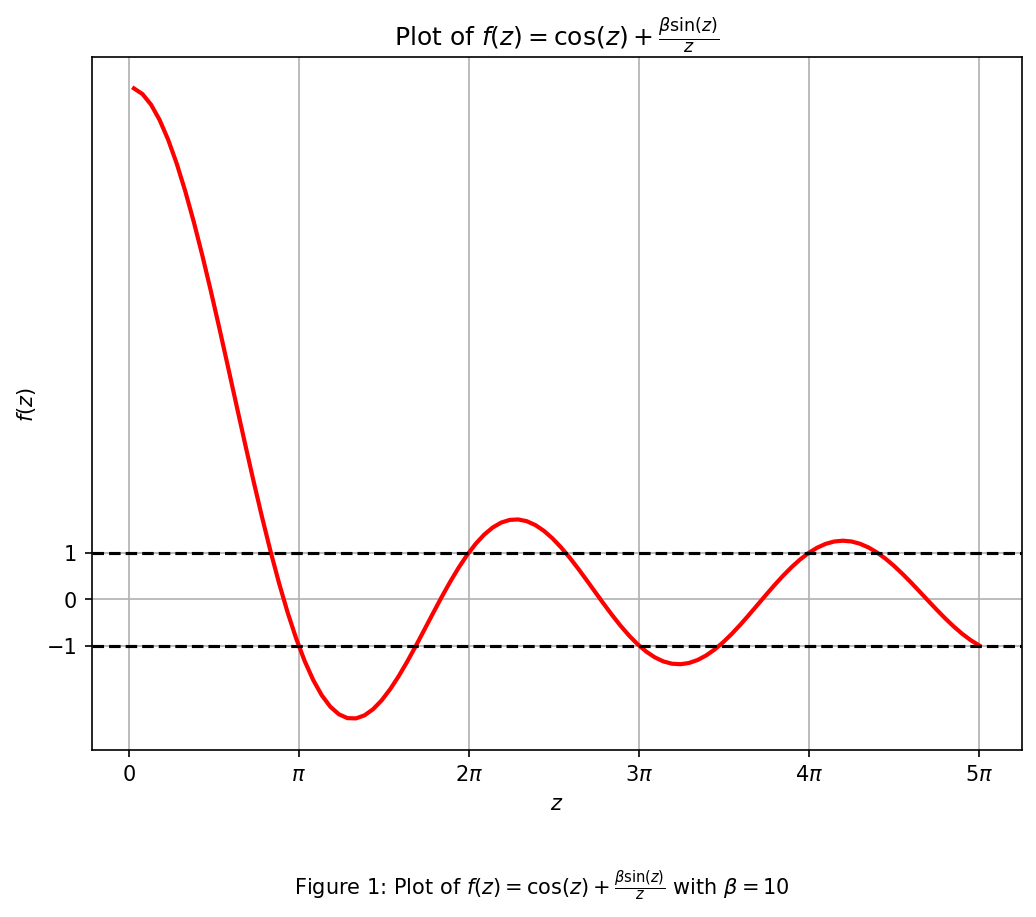

In [80]:
import numpy as np
import matplotlib.pyplot as plt


q = np.linspace(0.1,5*np.pi,100)
z = np.linspace(0.1,5*np.pi,100)
beta = 10

def f(z):
  f = np.cos(z) + beta*np.sin(z)/z
  return f

plt.plot(z,f(z),linewidth = 2.0,color = 'red')
plt.xlabel(r'$z$')
plt.ylabel(r'$f(z)$')
plt.title(r'Plot of $f(z) = \cos(z) + \frac{\beta\sin(z)}{z}$')
plt.grid(True)

# Add two horizontal lines at y =1 and y = -1
plt.axhline(y=1, color='black', linestyle='--', linewidth=1.5)
plt.axhline(y=-1, color='black', linestyle='--', linewidth=1.5)

# Ticks of the axes
plt.yticks([-1, 0, 1])
plt.xticks([0,np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi],
 [r'$0$',r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])

# Add caption below the plot
plt.figtext(0.5, -0.05, 'Figure 1: Plot of $f(z) = \cos(z) + \\frac{\\beta \sin(z)}{z}$ with $\\beta = 10$',
            ha='center', fontsize=10)

plt.show()

In [ ]:
plt.text(2, 1.1, 'Conduction Band', fontsize=9, color='blue')
plt.text(2, -1.4, 'Valence Band', fontsize=9, color='blue')
plt.text(2, 0, 'Forbidden Bandgap', fontsize=9, color='gray', ha='center')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


q = np.linspace(0.1,5*np.pi,100)
z = np.linspace(0.1,5*np.pi,100)
beta = 10

def f(z):
  f = np.cos(z) + beta*np.sin(z)/z
  return f

def plot_f(beta):
  plt.plot(z,f(z),linewidth = 2.0,color = 'red')
  plt.xlabel(r'$z$')
  plt.ylabel(r'$f(z)$')
  plt.title(r'Plot of $f(z) = \cos(z) + \frac{\beta\sin(z)}{z}$')
  plt.grid(True)

  # Add two horizontal lines at y =1 and y = -1
  plt.axhline(y=1, color='black', linestyle='--', linewidth=1.5)
  plt.axhline(y=-1, color='black', linestyle='--', linewidth=1.5)

  # Ticks of the axes
  plt.yticks([-1, 0, 1])
  plt.xticks([0,np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi],[r'$0$',r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])

  # Add caption below the plot
  plt.figtext(0.5, -0.05, 'Figure 1: Plot of $f(z) = \cos(z) + \\frac{\\beta \sin(z)}{z}$ with $\\beta = 10$',
              ha='center', fontsize=10)

  plt.show()

plot_f(beta=5)

In [ ]:
plot_f(beta=1)

# Problem 5.28 DJ Griffith Quantum Mechanics

**Kronig-Penney Model:**  
The equation is
$$
\cos(qa) = cos(ka) + sin(ka).\frac{m\alpha}{\hbar^2k)}
$$
Assuming $m=\alpha=\hbar=a=1.$  


So, the final equation become
$$
\cos(q) = cos(k) + \frac{sin(k)}{k}
$$


where k = $\sqrt(E)$

* if RHS $\in [-1,1]$, compute $q = cos^{-1}(RHS)$
* Record both (q,E) and (-q,E).
* Plot all valid (q,E) points

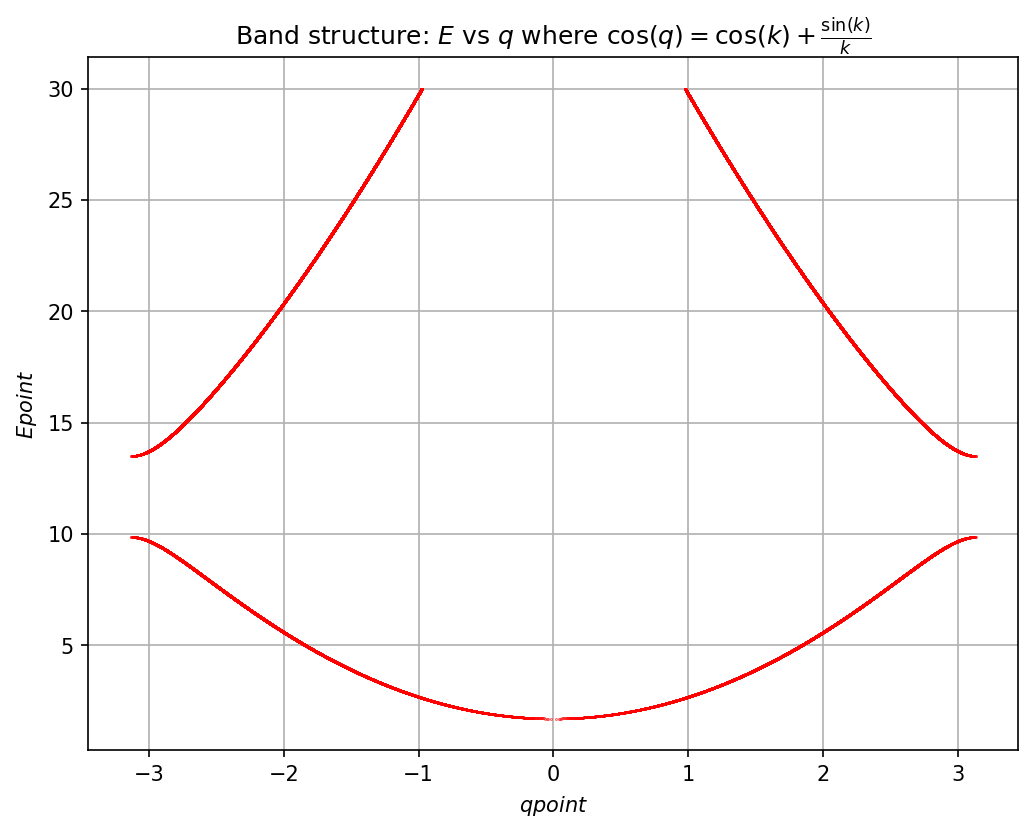

In [62]:
import numpy as np
import matplotlib.pyplot as plt

E = np.linspace(0.01,30,30000)

def RHS(E):
  k = np.sqrt(E)
  return np.cos(k)+np.sin(k)/k

q_points=[]
E_points=[]

for Ei in E:
  yi = RHS(Ei)
  if (-1<=yi<=1):
    qi=np.arccos(yi)
    q_points.extend([qi,-qi])
    E_points.extend([Ei,Ei])

plt.plot(q_points,E_points,'r.', markersize=0.5)
plt.xlabel(r'$q point$')
plt.ylabel(r'$E point$')
plt.title(r'Band structure: $E$ vs $q$ where $\cos(q) = \cos(k) + \frac{\sin(k)}{k}$')
plt.grid(True)
plt.show()

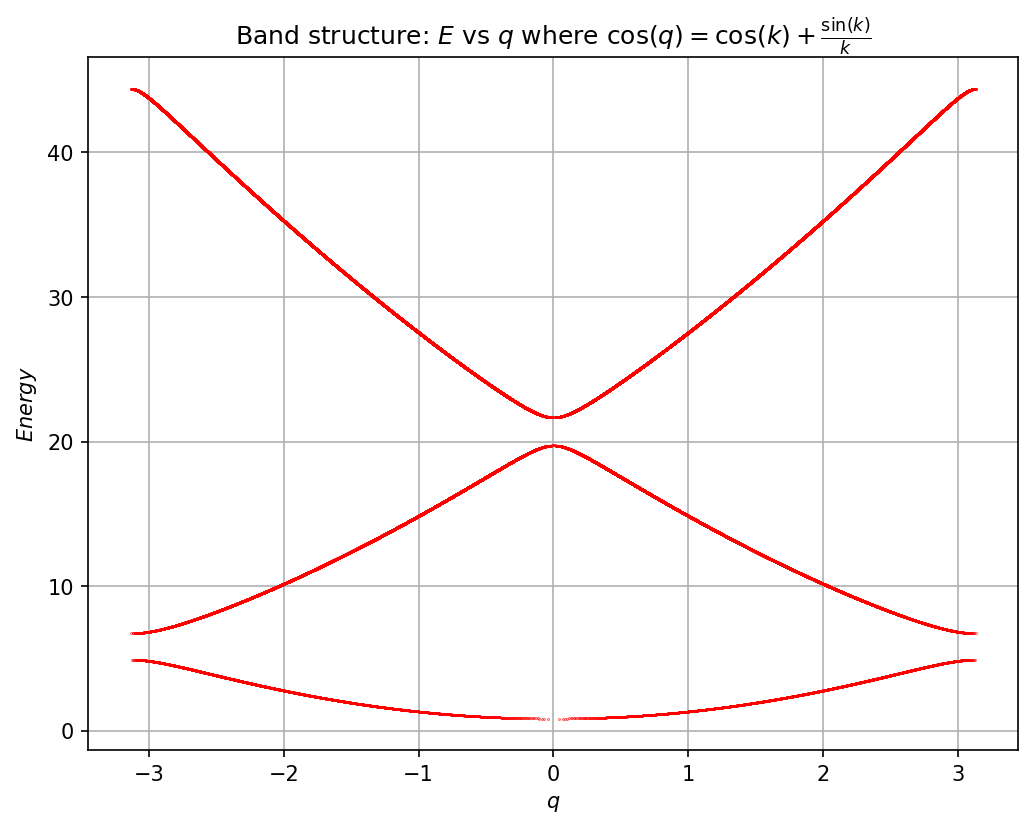

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m=1
hcut=1
a=1
alpha=1

# Energy range
E = np.linspace(0.01,45,30000)

# Kronig-Penny Function
def RHS(E):
  k = np.sqrt(2*m*E/hcut)
  return np.cos(k*a)+m*alpha*np.sin(k*a)/(k*hcut**2)

# Empty list to store the values
q_points=[]
E_points=[]

# Compare RHS between [-1,1]
for Ei in E:
  yi = RHS(Ei)
  if (-1<=yi<=1):
    qi=np.arccos(yi)
    q_points.extend([qi,-qi])
    E_points.extend([Ei,Ei])

# Plotting
plt.plot(q_points,E_points,'r.', markersize=0.5)
plt.xlabel(r'$q$')
plt.ylabel(r'$Energy$')
plt.title(r'Band structure: $E$ vs $q$ where $\cos(q) = \cos(k) + \frac{\sin(k)}{k}$')
plt.grid(True)
plt.show()

Some reference:
1. [Band Structure](https://www.damtp.cam.ac.uk/user/tong/aqm/aqmtwo.pdf)
